In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [15]:
#load and preprocess the MNIST dataset
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
x_train,x_test= x_train/255.0, x_test/255.0 #normailise the value of pixels
x_train=x_train[...,tf.newaxis]
x_test = x_test[...,tf.newaxis]


In [16]:
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [17]:
#lets create CNN model
model = tf.keras.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation= 'relu',input_shape=(28,28,1)),
                           tf.keras.layers.MaxPooling2D((2,2)),
                           tf.keras.layers.Conv2D(64,(3,3),activation= 'relu'),
                           tf.keras.layers.MaxPooling2D((2,2)),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(64,activation='relu', name='features'),
                           tf.keras.layers.Dense(10,activation='softmax')
                           ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Compile the CNN model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # or 'sparse_categorical_crossentropy' for integer labels
    metrics=['accuracy']              # Fixed: metrics uses a list
)

In [19]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ features (Dense)                │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# For integer labels (Option 1)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,  # y_train as integers (0, 1, 2,...)
    epochs=5,
    validation_split=0.1
)
# Evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2%}")

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 52s 29ms/step - accuracy: 0.8979 - loss: 0.3428 - val_accuracy: 0.9818 - val_loss: 0.0566
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9847 - loss: 0.0496 - val_accuracy: 0.9883 - val_loss: 0.0412
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9893 - loss: 0.0313 - val_accuracy: 0.9893 - val_loss: 0.0371
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9925 - loss: 0.0232 - val_accuracy: 0.9905 - val_loss: 0.0372
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 85s 29ms/step - accuracy: 0.9944 - loss: 0.0174 - val_accuracy: 0.9882 - val_loss: 0.0532
Test Accuracy: 98.97%


In [33]:
predictions=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [34]:
def plot_image(i, predictions_array, true_labels, imgs):
    """Plot a single image with prediction and confidence percentage."""
    true_label = true_labels[i]
    img = imgs[i].reshape(28, 28)  # Reshape for MNIST-style 28x28 images

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)  # Grayscale display

    predicted_label = np.argmax(predictions_array[i])  # Get top prediction
    confidence = 100 * np.max(predictions_array[i])

    # Set color: blue for correct, red for incorrect
    color = 'blue' if predicted_label == true_label else 'red'

    # Format label with confidence percentage
    plt.xlabel(f"Predicted: {predicted_label} ({confidence:.1f}%)\nTrue: {true_label}",
               color=color)

IndexError: index 10 is out of bounds for axis 0 with size 10

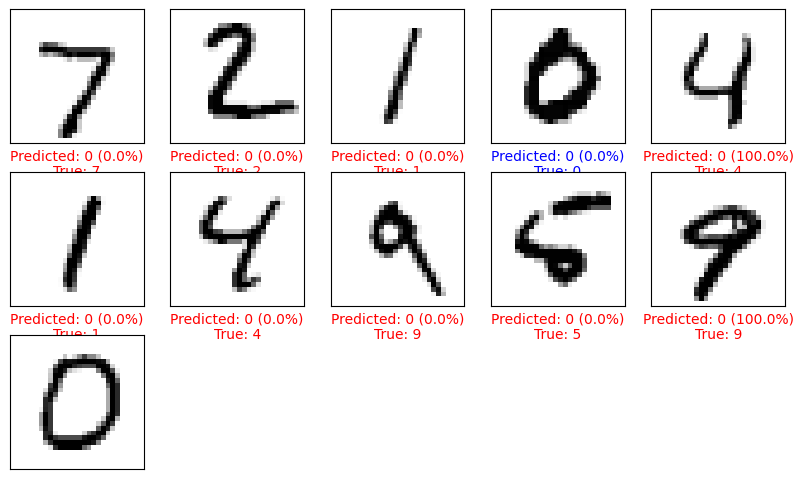

In [35]:
# Plot first 15 test images with predictions
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plot_image(i, predictions[i], y_test, x_test)
plt.tight_layout()
plt.show()  # Fixed from plot.show() to plt.show()